## Enzyme code

To import datasets and export final dataset and training set fingerprints for applicability domain calculation

In [1]:
# Enzyme code
enz = 'cruz'

## Install and import

In [2]:
# %%capture
# !pip install chembl_structure_pipeline rdkit

In [3]:
# Use this to import standardizing functions
import sys

from standardize import new_standardize_smiles, non_organic

[11:00:34] Initializing Normalizer


In [8]:
import rdkit

rdkit.__version__

'2023.03.2'

In [4]:
import numpy as np
import pandas as pd
from rdkit import Chem

In [5]:
# Make histogram
import matplotlib.pyplot as plt
import numpy as np

def histogram_pAct(series):
    # Extract the values from the 'pAct' column
    data = series.values

    # Create the histogram
    plt.hist(data, bins=list(range(3,12)), edgecolor='black', color='navy', alpha=0.7)
    plt.xlabel('pActivity Values')
    plt.ylabel('Frequency')
    plt.grid(False)

    # Calculate average, median, and standard deviation
    average = np.mean(data)
    median = np.median(data)
    std_dev = np.std(data)

    # Add text to the plot to show average, median, and standard deviation
    plt.text(0.62, 0.9, f'Average: {average:.2f}', transform=plt.gca().transAxes)
    plt.text(0.62, 0.85, f'Median: {median:.2f}', transform=plt.gca().transAxes)
    plt.text(0.62, 0.8, f'Standard Deviation: {std_dev:.2f}', transform=plt.gca().transAxes)

    # Show the plot
    plt.show()

In [6]:
# Import datasets
df_chembl = pd.read_csv(f"{enz}_chembl.csv", sep=';')
df_bindingdb = pd.read_csv(f"{enz}_bindingdb.tsv", sep='\t')

C:\Users\rafae\AppData\Local\Temp\ipykernel_4560\2570414818.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_chembl = pd.read_csv(f"{enz}_chembl.csv", sep=';')


In [7]:
df_chembl.head()

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Target Organism,Target Type,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties,Action Type
0,CHEMBL603089,NaN,None,557.59,2,6.03,3e,CCC(C(=O)COc1c(F)c(F)cc(F)c1F)n1cc([C@](C)(CC(...,Ratio,'=',...,Trypanosoma cruzi,SINGLE PROTEIN,CHEMBL1156871,1,Scientific Literature,J Med Chem,2010.0,None,NaN,NaN
1,CHEMBL579303,NaN,None,583.63,2,6.57,3f,CCCCC(C(=O)COc1c(F)c(F)cc(F)c1F)n1cc([C@@](C)(...,Ratio,'=',...,Trypanosoma cruzi,SINGLE PROTEIN,CHEMBL1156871,1,Scientific Literature,J Med Chem,2010.0,None,NaN,NaN
2,CHEMBL592646,NaN,None,597.66,2,6.96,3h,CCCCC(C(=O)COc1c(F)c(F)cc(F)c1F)n1cc([C@@](C)(...,Ratio,'=',...,Trypanosoma cruzi,SINGLE PROTEIN,CHEMBL1156871,1,Scientific Literature,J Med Chem,2010.0,None,NaN,NaN
3,CHEMBL592403,NaN,None,569.60,2,6.18,3c,CCCCC(C(=O)COc1c(F)c(F)cc(F)c1F)n1cc([C@@](C)(...,Ki,'=',...,Trypanosoma cruzi,SINGLE PROTEIN,CHEMBL1156871,1,Scientific Literature,J Med Chem,2010.0,None,NaN,NaN
4,CHEMBL566068,NaN,None,229.07,0,3.09,43,Oc1cc(-c2ccc(Cl)c(Cl)c2)[nH]n1,IC50,'=',...,Trypanosoma cruzi,SINGLE PROTEIN,CHEMBL1156758,1,Scientific Literature,J Med Chem,2010.0,None,NaN,NaN


In [8]:
df_bindingdb.head()

,BindingDB Reactant_set_id,Ligand SMILES,Ligand InChI,Ligand InChI Key,BindingDB MonomerID,BindingDB Ligand Name,Target Name,Target Source Organism According to Curator or DataSource,Ki (nM),IC50 (nM),...,UniProt (SwissProt) Recommended Name of Target Chain,UniProt (SwissProt) Entry Name of Target Chain,UniProt (SwissProt) Primary ID of Target Chain,UniProt (SwissProt) Secondary ID(s) of Target Chain,UniProt (SwissProt) Alternative ID(s) of Target Chain,UniProt (TrEMBL) Submitted Name of Target Chain,UniProt (TrEMBL) Entry Name of Target Chain,UniProt (TrEMBL) Primary ID of Target Chain,UniProt (TrEMBL) Secondary ID(s) of Target Chain,UniProt (TrEMBL) Alternative ID(s) of Target Chain
0,51439312,CN1CCN(CC1)C(=O)N[C@@H](Cc1ccccc1)C(=O)N[C@@H]...,InChI=1S/C32H38N4O4S/c1-35-20-22-36(23-21-35)3...,RHJLQMVZXQKJKB-JDXGNMNLSA-N,50229129,4-Methyl-piperazine-1-carboxylic acid [(S)-1-(...,Cruzipain,Trypanosoma cruzi,0.200000,NaN,...,Cruzipain,CYSP_TRYCR,P25779,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,51439295,O=C[C@H](Cc1ccccc1)NC(=O)[C@H](Cc1ccccc1)NC(=O...,InChI=1S/C26H26N2O4/c29-18-23(16-20-10-4-1-5-1...,OIKITZBTDSAJQH-ZEQRLZLVSA-N,50286450,CHEMBL128135::[(S)-1-((S)-1-Benzyl-2-oxo-ethyl...,Cruzipain,Trypanosoma cruzi,0.440000,NaN,...,Cruzipain,CYSP_TRYCR,P25779,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,50527569,C[C@H](NC(=O)[C@H](Cc1ccccc1)NC(=O)OCc1ccccc1)...,InChI=1S/C21H23N3O5/c1-16(12-13-24(27)28)22-20...,HNMPKMOYOSYDNW-BIZPYBIZSA-N,50201259,CHEMBL3907022,Cruzipain,Trypanosoma cruzi,0.440000,NaN,...,Cruzipain,CYSP_TRYCR,P25779,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,51439305,CN1CCN(CC1)C(=O)N[C@@H](Cc1ccccc1)C(=O)N[C@@H]...,InChI=1S/C25H32N4O3/c1-28-14-16-29(17-15-28)25...,BUMLVPVZNAMULE-GOTSBHOMSA-N,50581372,CHEMBL5079418,Cruzipain,Trypanosoma cruzi,0.500000,NaN,...,Cruzipain,CYSP_TRYCR,P25779,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,51223601,CC(C)C[C@H](N[C@@H](c1ccc(cc1)-c1ccccc1)C(F)(F...,InChI=1S/C29H30F3N3O/c1-20(2)17-26(28(36)34-25...,VCYHSLAYQYYGHC-QKDODKLFSA-N,50502827,CHEMBL4565840,Cruzipain,Trypanosoma cruzi,0.630957,NaN,...,Cruzipain,CYSP_TRYCR,P25779,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## ChEMBL

In [11]:
df_chembl.shape

(33255, 46)

In [12]:
# Select only compounds with SMILES
df_chembl = df_chembl[df_chembl['Smiles'].notna()]
df_chembl.shape

(33218, 46)

In [13]:
df_chembl["Standard Relation"].value_counts()

'='     32592
'>'       215
'>>'       32
'<'        30
'>='        6
'<='        1
Name: Standard Relation, dtype: int64

In [14]:
# Select values with exact activity or activity > 1000 nM (inactives) or activity < 1000 nM (actives)
df_sub = df_chembl[(df_chembl["Standard Relation"] == "'='") | \
                   ( (df_chembl["Standard Relation"] == "'>'") & (df_chembl["Standard Value"] >= 1000)) | \
                   ( (df_chembl["Standard Relation"] == "'<'") & (df_chembl["Standard Value"] <= 1000))]
df_sub.shape

(32797, 46)

In [15]:
df_sub["Standard Type"].value_counts()

Potency       30531
Inhibition      900
IC50            812
Ki              341
Ratio            59
Kinact           28
K                27
ID50             21
V0               18
Activity         17
K ass            13
k obs / 1         8
FC                5
Kcat/Km           4
K inact           3
K inact/Ki        3
Ka                3
Kd                2
Ratio IC50        2
Name: Standard Type, dtype: int64

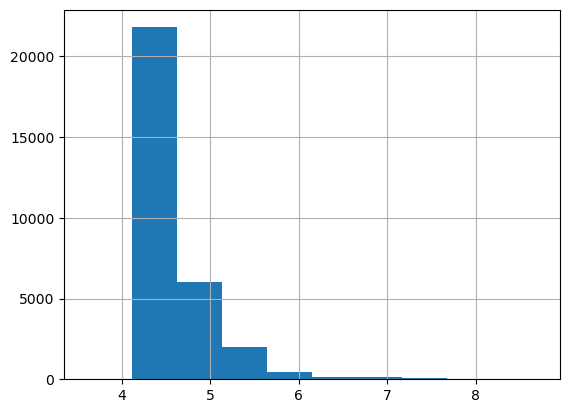

In [16]:
# Let's see what are these Potency values
df_pot = df_sub[df_sub["Standard Type"] == "Potency"]
df_pot_pAct = df_pot["Standard Value"].apply(lambda x: round(9 - np.log10(x), 2))
df_pot_pAct.hist();

Mostly inactive compounds. For consistency, let's select IC50 and Ki for training and keep Potency as a test set.

In [17]:
# Select only IC50 and Ki
df_sub2 = df_sub[df_sub["Standard Type"].isin(["IC50", "Ki"])]
df_sub2.shape

(1153, 46)

In [18]:
df_sub2["Standard Units"].value_counts()

nM    1153
Name: Standard Units, dtype: int64

In [19]:
# Select activities with nanomolar units
df_sub3 = df_sub2[df_sub2["Standard Units"] == "nM"]
df_sub3.shape

(1153, 46)

In [20]:
# Multiply Ki values by 2.3 -> create column Kix23
# See: Comparability of Mixed IC50 Data – A Statistical Analysis

selected_rows = df_sub3[df_sub3['Standard Type'] == 'Ki']

if not selected_rows.empty:
    new_rows = selected_rows.copy()
    new_rows['Standard Value'] = new_rows['Standard Value'] * 2.3
    new_rows['Standard Type'] = 'Kix23'

    # Add values to dataset
    df_sub3 = pd.concat([df_sub3, new_rows], ignore_index=False)

In [21]:
df_sub3.shape

(1494, 46)

In [22]:
df_sub4 = df_sub3[df_sub3["Standard Type"].isin(["IC50", "Kix23"])].copy()
df_sub4.shape

(1153, 46)

In [23]:
# Create pAct column = -log10 activity. 9 is added to convert nM -> M
df_sub4["pAct"] = df_sub4["Standard Value"].apply(lambda x: round(9 - np.log10(x), 2))

df_sub5 = df_sub4[['Smiles', 'pAct']]
df_sub5.head()

,Smiles,pAct
4,Oc1cc(-c2ccc(Cl)c(Cl)c2)[nH]n1,4.92
5,O=C(CSc1nnc(-c2ccccc2)o1)N1CCN(c2ccccc2)CC1,4.52
6,Cc1ccc(NC(=O)CSC(N)=O)cc1Cl,4.22
7,C=CCNC(=O)c1cc([N+](=O)[O-])cc2c(=O)[nH]c(Nc3c...,4.22
8,Cc1ccc(NC(=O)c2ccc(CN3CCN(C)CC3)cc2)cc1Nc1nccc...,3.68


In [24]:
df_sub5.shape

(1153, 2)

In [25]:
# Delete activity values outside the usual range
df_sub6 = df_sub5[~(df_sub5['pAct'] < 3) & ~(df_sub5['pAct'] > 12)]
df_sub6.shape

(1149, 2)

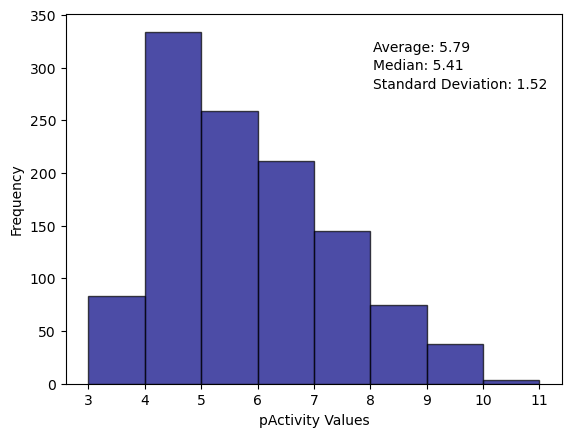

In [26]:
histogram_pAct(df_sub6["pAct"])

## BindingDB

In [27]:
df_bindingdb.shape

(1150, 50)

In [28]:
df_bindingdb.columns

Index(['BindingDB Reactant_set_id', 'Ligand SMILES', 'Ligand InChI',
       'Ligand InChI Key', 'BindingDB MonomerID', 'BindingDB Ligand Name',
       'Target Name',
       'Target Source Organism According to Curator or DataSource', 'Ki (nM)',
       'IC50 (nM)', 'Kd (nM)', 'EC50 (nM)', 'kon (M-1-s-1)', 'koff (s-1)',
       'pH', 'Temp (C)', 'Curation/DataSource', 'Article DOI',
       'BindingDB Entry DOI', 'PMID', 'PubChem AID', 'Patent Number',
       'Authors', 'Institution', 'Link to Ligand in BindingDB',
       'Link to Target in BindingDB',
       'Link to Ligand-Target Pair in BindingDB', 'Ligand HET ID in PDB',
       'PDB ID(s) for Ligand-Target Complex', 'PubChem CID of Ligand',
       'PubChem SID of Ligand', 'ChEBI ID of Ligand', 'ChEMBL ID of Ligand',
       'DrugBank ID of Ligand', 'IUPHAR_GRAC ID of Ligand',
       'KEGG ID of Ligand', 'ZINC ID of Ligand',
       'Number of Protein Chains in Target (>1 implies a multichain complex)',
       'BindingDB Target Chain Sequ

In [29]:
df_bindingdb = df_bindingdb[df_bindingdb['Ligand SMILES'].notna()]
df_bindingdb.shape

(1150, 50)

In [30]:
print(df_bindingdb.shape[0] - df_bindingdb['Ki (nM)'].isna().sum())
print(df_bindingdb.shape[0] - df_bindingdb['IC50 (nM)'].isna().sum())
print(df_bindingdb.shape[0] - df_bindingdb['Kd (nM)'].isna().sum())
print(df_bindingdb.shape[0] - df_bindingdb['EC50 (nM)'].isna().sum())

332
818
0
0


In [31]:
# Select only IC50 and Ki
dfbd = df_bindingdb[['Ligand SMILES', 'Ki (nM)', 'IC50 (nM)']]

In [32]:
dfbd

,Ligand SMILES,Ki (nM),IC50 (nM)
0,CN1CCN(CC1)C(=O)N[C@@H](Cc1ccccc1)C(=O)N[C@@H]...,0.200000,NaN
1,O=C[C@H](Cc1ccccc1)NC(=O)[C@H](Cc1ccccc1)NC(=O...,0.440000,NaN
2,C[C@H](NC(=O)[C@H](Cc1ccccc1)NC(=O)OCc1ccccc1)...,0.440000,NaN
3,CN1CCN(CC1)C(=O)N[C@@H](Cc1ccccc1)C(=O)N[C@@H]...,0.500000,NaN
4,CC(C)C[C@H](N[C@@H](c1ccc(cc1)-c1ccccc1)C(F)(F...,0.630957,NaN
...,...,...,...
1145,Clc1cccc(Nc2nc(nc3n(cnc23)C2CCCC2)C#N)c1,NaN,40
1146,CCC(=NNC(N)=S)c1cccc(Br)c1,NaN,40
1147,COc1cc(C=NNC(=O)c2nc(no2)-c2ccc(Cl)cc2)ccc1O,NaN,40
1148,CC1CN(N=C1c1cccc(c1)C(F)(F)F)C(N)=S,NaN,40


In [33]:
# Check if any row has both Ki and IC50
print((dfbd['Ki (nM)'].notna() & dfbd['IC50 (nM)'].notna()).sum())

# Check both NaN
print((dfbd['Ki (nM)'].isna() & dfbd['IC50 (nM)'].isna()).sum())

0
0


In [34]:
# Remove both NaN
dfbd2 = dfbd[~(dfbd['Ki (nM)'].isna() & dfbd['IC50 (nM)'].isna())].copy()
dfbd2.shape

(1150, 3)

In [35]:
# Create new column to include compounds with relation '>' if activity >= 1000
# or '<' if activity < 1000
merged_act = dfbd2['Ki (nM)'].combine_first(dfbd2['IC50 (nM)'])

act_values = []

for value in merged_act:
    if value[0] == '>':
        new_value = float(value[1:])
        if new_value >= 1000:
            act_values.append(new_value)
        else:
            act_values.append(0)
    elif value[0] == '<':
        new_value = float(value[1:])
        if new_value <= 1000:
            act_values.append(new_value)
        else:
            act_values.append(0)
    elif value[0] == '~':
        act_values.append(0)
    else:
        act_values.append(float(value))

In [36]:
# Multiply Ki values by 2.3
mult = []

for b in dfbd2['Ki (nM)'].notna():
    if b:
        mult.append(2.3)
    else:
        mult.append(1)

# Create Standard Value-like column
std_values = [act_values[i] * mult[i] for i in range(len(act_values))]

In [37]:
dfbd3 = pd.DataFrame()
dfbd3['Ligand SMILES'] = dfbd2['Ligand SMILES']
dfbd3['Act'] = std_values
dfbd3.shape

(1150, 2)

In [38]:
# Drop rows that failed: value 0 on act_values
dfbd4 = dfbd3[dfbd3['Act'] != 0].copy()
dfbd4.shape

(1139, 2)

In [39]:
dfbd4

,Ligand SMILES,Act
0,CN1CCN(CC1)C(=O)N[C@@H](Cc1ccccc1)C(=O)N[C@@H]...,0.460000
1,O=C[C@H](Cc1ccccc1)NC(=O)[C@H](Cc1ccccc1)NC(=O...,1.012000
2,C[C@H](NC(=O)[C@H](Cc1ccccc1)NC(=O)OCc1ccccc1)...,1.012000
3,CN1CCN(CC1)C(=O)N[C@@H](Cc1ccccc1)C(=O)N[C@@H]...,1.150000
4,CC(C)C[C@H](N[C@@H](c1ccc(cc1)-c1ccccc1)C(F)(F...,1.451201
...,...,...
1145,Clc1cccc(Nc2nc(nc3n(cnc23)C2CCCC2)C#N)c1,40.000000
1146,CCC(=NNC(N)=S)c1cccc(Br)c1,40.000000
1147,COc1cc(C=NNC(=O)c2nc(no2)-c2ccc(Cl)cc2)ccc1O,40.000000
1148,CC1CN(N=C1c1cccc(c1)C(F)(F)F)C(N)=S,40.000000


In [40]:
dfbd4["Act"].isna().sum()

0

In [41]:
# Create pAct column
dfbd4["pAct"] = dfbd4["Act"].apply(lambda x: round(9 - np.log10(x), 2))
dfbd4

,Ligand SMILES,Act,pAct
0,CN1CCN(CC1)C(=O)N[C@@H](Cc1ccccc1)C(=O)N[C@@H]...,0.460000,9.34
1,O=C[C@H](Cc1ccccc1)NC(=O)[C@H](Cc1ccccc1)NC(=O...,1.012000,8.99
2,C[C@H](NC(=O)[C@H](Cc1ccccc1)NC(=O)OCc1ccccc1)...,1.012000,8.99
3,CN1CCN(CC1)C(=O)N[C@@H](Cc1ccccc1)C(=O)N[C@@H]...,1.150000,8.94
4,CC(C)C[C@H](N[C@@H](c1ccc(cc1)-c1ccccc1)C(F)(F...,1.451201,8.84
...,...,...,...
1145,Clc1cccc(Nc2nc(nc3n(cnc23)C2CCCC2)C#N)c1,40.000000,7.40
1146,CCC(=NNC(N)=S)c1cccc(Br)c1,40.000000,7.40
1147,COc1cc(C=NNC(=O)c2nc(no2)-c2ccc(Cl)cc2)ccc1O,40.000000,7.40
1148,CC1CN(N=C1c1cccc(c1)C(F)(F)F)C(N)=S,40.000000,7.40


In [42]:
# Delete activity values outside the usual range
dfbd5 = dfbd4[~(dfbd4['pAct'] < 3) & ~(dfbd4['pAct'] > 12)]
dfbd5.shape

(1135, 3)

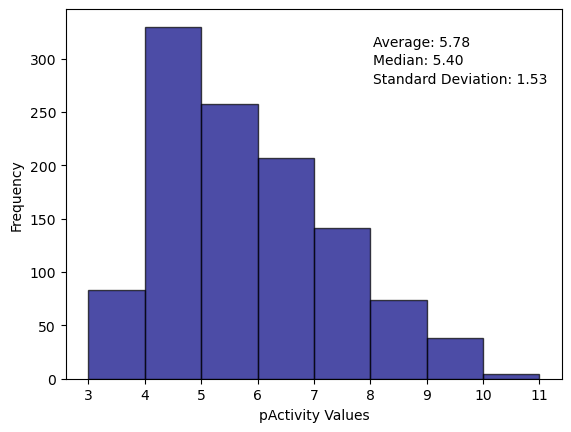

In [43]:
histogram_pAct(dfbd5["pAct"])

## Standardize SMILES and merge datasets

In [44]:
%%capture
df_sub6["standard_SMILES"] = df_sub6["Smiles"].apply(lambda smi: new_standardize_smiles(smi, return_mol=False))

In [45]:
df_sub6.shape  # (1149, 3)

(1149, 3)

In [46]:
# Drop rows that failed standardization
df_sub7 = df_sub6.dropna(subset="standard_SMILES")
print(df_sub7.shape)

(1149, 3)


In [47]:
%%capture
dfbd5["standard_SMILES"] = dfbd5["Ligand SMILES"].apply(lambda smi: new_standardize_smiles(smi, return_mol=False))

In [48]:
dfbd5.shape  # (1135, 4)

(1135, 4)

In [49]:
# Drop rows that failed standardization
dfbd6 = dfbd5.dropna(subset="standard_SMILES")
print(dfbd6.shape)

(1135, 4)


In [50]:
# Merge datasets
df_sub8 = df_sub7[["standard_SMILES", "pAct"]].copy()
dfbd7 = dfbd6[["standard_SMILES", "pAct"]].copy()

df_merge = pd.concat([df_sub8, dfbd7]).reset_index(drop=True)
df_merge.shape

(2284, 2)

In [51]:
# Remove structures with "non-organic" atoms
df_merge["not_org"] = df_merge["standard_SMILES"].apply(non_organic)
df_org = df_merge[df_merge["not_org"] == False].copy()
df_org.reset_index(drop=True, inplace=True)
df_org.shape

(2280, 3)

In [52]:
df_merge[df_merge["not_org"]]

,standard_SMILES,pAct,not_org
876,CCCC/C(=N/NC(N)=[Se])c1ccc(Cl)c(Cl)c1,7.83,True
897,CCCC/C(=N/NC(N)=[Se])c1ccc(Cl)c(Cl)c1,8.07,True
945,NC(=[Se])NN=C(c1cccc(Br)c1)c1cccc(Br)c1,7.51,True
1088,C/C(=N\NC(N)=[Se])c1cccc(Br)c1,7.17,True


In [53]:
# Check SMILES
# Neq0500 = new_standardize_smiles("N#CCNC(=O)C(Cc1ccccc1)NC(=O)OCc1ccccc1", return_mol=False) # Neq0500
# Neq0869 = new_standardize_smiles("CC(C)CC(NC(=O)OC(C)(C)C)C(=O)NC1(C#N)CC1", return_mol=False) # Neq0869

# Neq631 = "N#CC1(NC(=O)C(Cc2ccccc2)NC(c2ccccc2)C(F)(F)F)CC1"
# Neq809 = "N#CC1(NC(=O)C(Cc2ccccc2)NC(c2ccc(Br)cc2)C(F)(F)F)CC1"

# df_merge[df_merge["standard_SMILES"] == Neq631]

In [54]:
# Calculate fingerprints as strings
from rdkit.Chem import rdFingerprintGenerator

mfpgen = rdFingerprintGenerator.GetMorganGenerator(radius=3, fpSize=1024)

df_org["FP"] = df_org["standard_SMILES"].apply(lambda smi: "".join(mfpgen.GetFingerprintAsNumPy(Chem.MolFromSmiles(smi)).astype(str)))



In [55]:
# Remove duplicates, keeping the most potent instance
df_undup = df_org.sort_values("pAct", ascending=False).drop_duplicates(subset="FP").copy()
df_undup.shape  # was (860, 4)

(860, 4)

In [56]:
# Remove MW < 200 and MW > 1000 compounds
from rdkit.Chem import Descriptors
df_undup["MW"] = df_undup["standard_SMILES"].apply(lambda smi: Descriptors.MolWt(Chem.MolFromSmiles(smi)))
df_final = df_undup[~(df_undup['MW'] < 200) & ~(df_undup['MW'] > 1000)].copy()

In [57]:
df_final.shape  # was (857, 5)

(857, 5)

In [58]:
df_final.head()

,standard_SMILES,pAct,not_org,FP,MW
2162,COC1=CC(=O)N(C(=O)/C=C/[C@H](C)NC(=O)C(CC(C)C)...,10.09,False,0110100000001000000010000000110101100100000000...,732.967
2163,COC1=CC(=O)N(C(=O)/C=C/[C@H](C)NC(=O)C(CC(C)C)...,10.07,False,0110100000001000000010000000110101100100000000...,730.951
678,COC1=CC(=O)N(C(=O)/C=C/[C@H](CCc2ccccc2)NC(=O)...,10.05,False,0100100000001000000011000000010111100000001000...,783.027
2165,CS(=O)(=O)c1ccc(-c2ccc([C@H](NC(CC(Cl)Cl)C(=O)...,10.00,False,0100000000100000000000000010000011000010001000...,612.501
734,COC1=CC(=O)N(C(=O)/C=C/[C@@H](CCc2ccccc2)NC(=O...,9.96,False,0100100000001000000011000000010111100000001000...,845.098


# Describe datasets and export

In [59]:
# Number of compounds
df_final.shape

(857, 5)

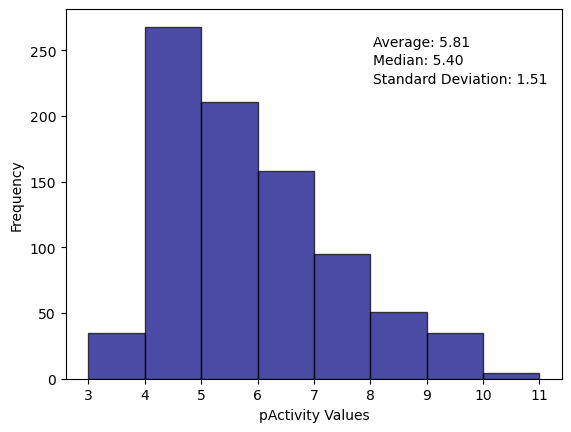

In [60]:
# Plot histogram with average and median activity and SD
histogram_pAct(df_final["pAct"])

In [61]:
# Final count actives/inactives
df_final["Active"] = df_final["pAct"] >= 6.0
df_final["Active"] = df_final["Active"].astype(int)

print("Actives:", df_final["Active"].sum())
print("Inactives:", len(df_final["Active"]) - df_final["Active"].sum())


Actives: 343
Inactives: 514


In [62]:
# Export classification dataset as .csv
df_csv = df_final[["standard_SMILES", "Active"]]
path_csv = f"{enz}_final.csv"

df_csv.to_csv(path_csv, sep=";", index=False)

In [66]:
# Compare to original
df_final_orig = pd.read_csv("cruz_final_original.csv", sep=";")
df_final_orig.head()

,standard_SMILES,Active
0,COC1=CC(=O)N(C(=O)C=CC(C)NC(=O)C(CC(C)C)NC(=O)...,1
1,COC1=CC(=O)N(C(=O)C=CC(C)NC(=O)C(CC(C)C)NC(=O)...,1
2,COC1=CC(=O)N(C(=O)C=CC(CCc2ccccc2)NC(=O)C(CC(C...,1
3,CS(=O)(=O)c1ccc(-c2ccc(C(NC(CC(Cl)Cl)C(=O)NC(C...,1
4,COC1=CC(=O)N(C(=O)C=CC(CCc2ccccc2)NC(=O)C(CC(C...,1


In [67]:
df_final_orig.standard_SMILES.isna().sum()

0

In [64]:
# Find values in df_final["standard_SMILES"] that are not in df_final_original["standard_SMILES"]
new_smiles = df_final[~df_final["standard_SMILES"].isin(df_final_orig["standard_SMILES"])]
new_smiles

,standard_SMILES,pAct,not_org,FP,MW,Active
2162,COC1=CC(=O)N(C(=O)/C=C/[C@H](C)NC(=O)C(CC(C)C)...,10.09,False,0110100000001000000010000000110101100100000000...,732.967,1
2163,COC1=CC(=O)N(C(=O)/C=C/[C@H](C)NC(=O)C(CC(C)C)...,10.07,False,0110100000001000000010000000110101100100000000...,730.951,1
678,COC1=CC(=O)N(C(=O)/C=C/[C@H](CCc2ccccc2)NC(=O)...,10.05,False,0100100000001000000011000000010111100000001000...,783.027,1
2165,CS(=O)(=O)c1ccc(-c2ccc([C@H](NC(CC(Cl)Cl)C(=O)...,10.00,False,0100000000100000000000000010000011000010001000...,612.501,1
734,COC1=CC(=O)N(C(=O)/C=C/[C@@H](CCc2ccccc2)NC(=O...,9.96,False,0100100000001000000011000000010111100000001000...,845.098,1
...,...,...,...,...,...,...
613,COc1ccc(C(=O)N/N=C/c2ccoc2)c(OC)c1,3.78,False,0000000000000100000000000000000001000000000000...,274.276,0
2154,CN1CCN(C(=O)NC(Cc2ccccc2)C(=O)N[C@@H]2Cc3ccccc...,3.64,False,0100000000000010000000100000000011000000001010...,436.556,0
1111,CCOC(=O)/C=C/C1(NC(=O)C(Cc2ccccc2)NC(=O)OCc2cc...,3.54,False,0100000000000000000000000000000111001001011000...,436.508,0
1110,CCN(CC)C(=O)/C=C/C1(NC(=O)C(Cc2ccccc2)NC(=O)OC...,3.34,False,0100000000000000000000000000000111001000011000...,463.578,0


# MODI

In [6]:
df_final = pd.read_csv("cruz_final.csv", sep=";")

In [8]:
# Calculate fingerprints as strings
from rdkit.Chem import rdFingerprintGenerator

mfpgen = rdFingerprintGenerator.GetMorganGenerator(radius=3, fpSize=1024)

df_final["FP"] = df_final["standard_SMILES"].apply(lambda smi: "".join(mfpgen.GetFingerprintAsNumPy(Chem.MolFromSmiles(smi)).astype(str)))


In [9]:
# Create 2D array of fingerprints as lists to use MODI
fp_array = np.vstack([list(st) for st in df_final["FP"]])
fp_array.shape

(863, 1024)

In [11]:
# MODI
# See: https://github.com/molecularmodelinglab/MODI
import modi

modi_value = modi.modi(fp_array, np.array(df_final["Active"]))
modi_value

0.8123036415066915

# Applicability domain

According to [Efficiency of different measures for defining the applicability domain of classification models], predict_proba (confidence estimation) tends to be a better AD than using nearest neighbors (novelty detection).
